In [1]:
import pandas as pd
import sqlite3
import pickle
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
conn = sqlite3.connect('stone_trial.db')
query = "SELECT cnpj, nome, abertura, atividade_principal, capital_social, qsa FROM empresa;"
 
df = pd.read_sql_query(query,conn)

df['atividade_principal'] = df['atividade_principal'].apply(pickle.loads)
df['qsa'] = df['qsa'].apply(pickle.loads).apply(lambda lista: [x['nome'] for x in lista])

df['codigo_atividade'] = df['atividade_principal'].apply(lambda x: x[0]['code'])
df['atividade_principal'] = df['atividade_principal'].apply(lambda x: x[0]['text'])

total = df.capital_social.sum()
df['capital_proporcional'] = df['capital_social'].apply(lambda x: f'{x/total:.2%}')

# Lista das Empresas

In [3]:
df_capital_display = df.copy()
df_capital_display['capital_social'] = df_capital_display['capital_social'].apply(lambda x: f'R${x:.2f}')
df_capital_display.sort_values('codigo_atividade')

,cnpj,nome,abertura,atividade_principal,capital_social,qsa,codigo_atividade,capital_proporcional
4,12.839.955/0001-16,EQUALS SOCIEDADE ANONIMA,09/11/2010,Desenvolvimento de programas de computador sob...,R$4206983.36,"[FABRICIO BATISTA DA COSTA, MARCELO LUIZ GARCI...",62.01-5-01,0.22%
5,16.569.357/0001-25,BUY4 PROCESSAMENTO DE PAGAMENTOS S.A.,11/07/2012,Desenvolvimento de programas de computador sob...,R$38553675.79,"[FABIO AUGUSTO CANTIZANI BARBOSA, BERNARDO FRE...",62.01-5-01,2.02%
2,14.994.237/0001-40,MUNDIPAGG TECNOLOGIA EM PAGAMENTOS S.A.,03/02/2012,Desenvolvimento e licenciamento de programas d...,R$10000.00,"[AMANDA LUZ SANT ANNA, RODRIGO SOUZA DO NASCIM...",62.02-3-00,0.00%
3,13.966.572/0001-71,CAPPTA S.A.,06/07/2011,Desenvolvimento e licenciamento de programas d...,R$1117796.00,"[RODRIGO RASERA, THIAGO TEIXEIRA PINTO, RAFAEL...",62.02-3-00,0.06%
1,18.727.053/0001-74,PAGAR.ME PAGAMENTOS S.A.,22/08/2013,Desenvolvimento e licenciamento de programas d...,R$1001000.00,"[THIAGO DOS SANTOS PIAU, CARLOS ALBERTO BORDIN...",62.03-1-00,0.05%
6,16.575.851/0001-00,DLP PAGAMENTOS BRASIL S.A.,06/07/2012,Holdings de instituições não-financeiras,R$895899621.22,"[AMANDA LUZ SANT ANNA, THIAGO DOS SANTOS PIAU,...",64.62-0-00,46.92%
0,16.501.555/0001-57,STONE PAGAMENTOS S.A.,22/06/2012,Outras atividades de serviços prestados princi...,R$491792277.61,"[AUGUSTO BARBOSA ESTELLITA LINS, THIAGO DOS SA...",82.99-7-99,25.75%
7,12.592.831/0001-89,MNLT SOLUCOES DE PAGAMENTO S.A.,21/09/2010,Outras atividades de serviços prestados princi...,R$476990302.00,"[THIAGO DOS SANTOS PIAU, CARLOS ALBERTO BORDIN...",82.99-7-99,24.98%


# Gráficos

## Completo:

(-1.120512933818945,
 1.1009768063723306,
 -1.1252583816054635,
 1.6232073164112644)

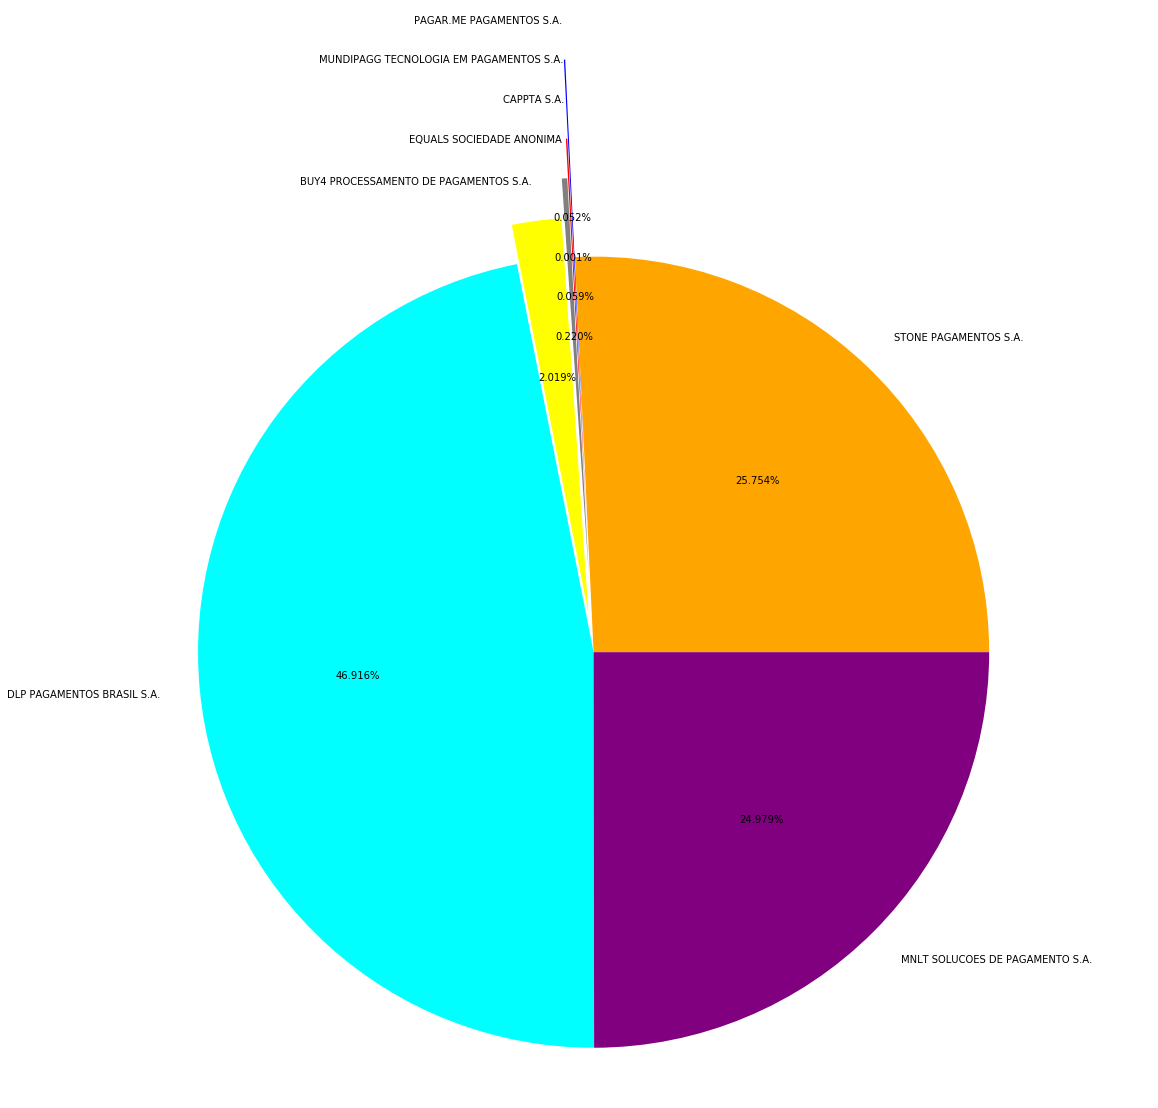

In [4]:
plt.figure(figsize=(20, 20))
colors=['orange', 'blue', 'green','red', 'gray', 'yellow', 'cyan', 'purple']
explode=[0, 0.5, 0.4, 0.3, 0.2, 0.1, 0, 0]

plt.pie(df.capital_social, labels=df.nome, autopct='%1.3f%%', colors=colors, explode=explode)
plt.axis('equal')

## Empresas menores que 2%

(-1.1022203720660062,
 1.1001057320031431,
 -1.101255511778277,
 1.1026714079141871)

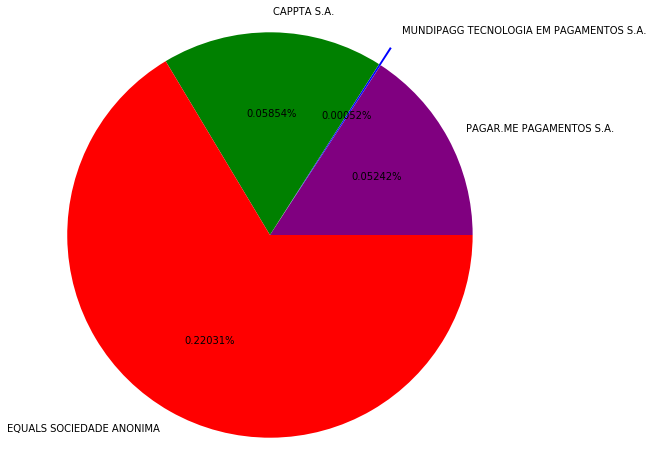

In [5]:
df_menores = df.where(df.capital_social < 2*total/100).dropna()

plt.figure(figsize=(8, 8))
colors=['purple', 'blue', 'green','red', 'gray']
explode = [0, 0.1, 0, 0]

labels = iter(df_menores.capital_social/total)

plt.pie(df_menores.capital_social, labels=df_menores.nome, colors=colors, 
        explode=explode, autopct=lambda p: f'{next(labels):.5%}')
plt.axis('equal')

## Empresas maiores que 2%

(-1.1189494060231704,
 1.1009023542818461,
 -1.1008195143573292,
 1.1060820674030205)

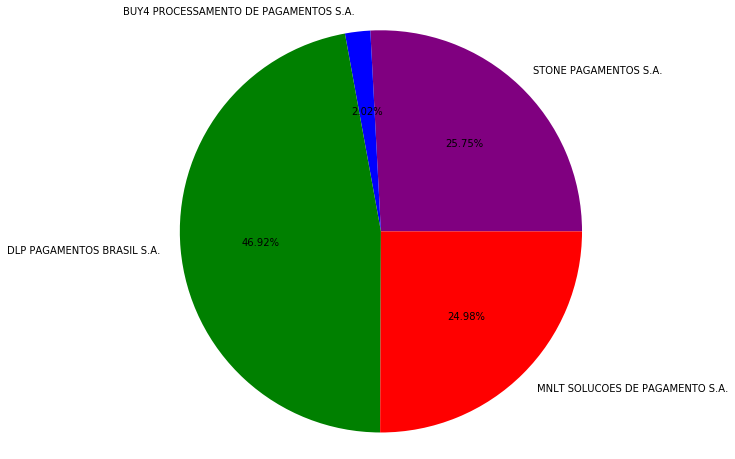

In [6]:
df_maiores = df.where(df.capital_social > 2*total/100).dropna()

plt.figure(figsize=(8, 8))
colors=['purple', 'blue', 'green','red', 'gray']

labels = iter(df_maiores.capital_social/total)

plt.pie(df_maiores.capital_social, labels=df_maiores.nome, colors=colors, 
        autopct=lambda p: f'{next(labels):.2%}')
plt.axis('equal')

# Sócios em multiplas empresas

In [7]:
socios = {}
for i in range(len(df)):
    for socio in df.iloc[i]['qsa']:
        empresas = socios.get(socio, [])
        empresas.append(df.iloc[i]['nome'])
        socios[socio] = empresas

socio_em_multiplas_empresas = [socio for socio in socios if len(socios[socio])>1]

for s in socio_em_multiplas_empresas:
    print(s, f'({len(socios[s])} empresas)')
    for e in socios[s]:
        print('\t', e)
    print('\n')

AUGUSTO BARBOSA ESTELLITA LINS (3 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


THIAGO DOS SANTOS PIAU (5 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 EQUALS SOCIEDADE ANONIMA
	 DLP PAGAMENTOS BRASIL S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


CARLOS ALBERTO BORDINI (3 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


RAFAEL MARTINS PEREIRA (4 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 DLP PAGAMENTOS BRASIL S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


SANDRA RIBAS BOLFER (3 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


MAURICIO DE OLIVEIRA ZANELLA (3 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


CAIO FIUZA SILVA (3 empresas)
	 STONE PAGAMENTOS S.A.
	 PAGAR.ME PAGAMENTOS S.A.
	 MNLT SOLUCOES DE PAGAMENTO S.A.


VINICIUS DO NASCIMENTO CARRASCO (2 empresas)
	 ST